t=0.0, r=30000000000.0, θ=1.5707963267948966, φ=3.5
result of step r=-0.49995, θ=0.0, φ=7.407407407407408e-24
t=1e-06, r=30000000000.0, θ=1.5707963267948966, φ=3.5
result of step r=-0.49995, θ=0.0, φ=7.407407407407408e-24
t=1.9999999999999998e-05, r=29999999999.99999, θ=1.5707963267948966, φ=3.5
result of step r=-0.49995, θ=0.0, φ=7.407407407407414e-24
t=2.9999999999999997e-05, r=29999999999.999985, θ=1.5707963267948966, φ=3.5
result of step r=-0.49995, θ=0.0, φ=7.407407407407415e-24
t=7.999999999999999e-05, r=29999999999.99996, θ=1.5707963267948966, φ=3.5
result of step r=-0.49995, θ=0.0, φ=7.407407407407427e-24
t=8.888888888888888e-05, r=29999999999.999954, θ=1.5707963267948966, φ=3.5
result of step r=-0.49995, θ=0.0, φ=7.407407407407431e-24
t=9.999999999999999e-05, r=29999999999.99995, θ=1.5707963267948966, φ=3.5
result of step r=-0.49995, θ=0.0, φ=7.407407407407433e-24
t=9.999999999999999e-05, r=29999999999.99995, θ=1.5707963267948966, φ=3.5
result of step r=-0.49995, θ=0.0, φ=7.40

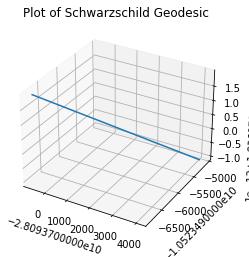

In [5]:
from scipy.constants import pi
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

r_0 = 3e10
theta_0 = pi/2
phi_0 = 3.5

initial_pos = [r_0, theta_0, phi_0]

def d_dt(t, X, E=1.5, L=1, M=1.2e9, m=150, G=6.67e-11, c=3e8):
    print ("t={}, r={}, θ={}, φ={}".format(t, *X))
    r, theta, phi = X
    dr_dt = ((E / m) ** 2 - (1 - (2 * G * M) / (c ** 2 * r)) * (1 + (L ** 2) / (m ** 2 * r ** 2))) ** 1/2
    dtheta_dt = 0 # orbits are planar, so dtheta/dt doesn't change
    dphi_dt = L / m * 1 / (r ** 2 * np.sin(theta_0) ** 2)
    result = np.array([dr_dt, dtheta_dt, dphi_dt])
    print ("result of step r={}, θ={}, φ={}".format(*result))

    return result

tmax = 10000
samples = 5000
t = np.linspace(0, tmax, samples)
geodesic = solve_ivp(d_dt, (0, tmax), y0=initial_pos, dense_output=True)
r, theta, phi = geodesic.sol(t)


fig = plt.figure()
ax = plt.axes(projection='3d')

# Convert from spherical to cartesian
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

ax.plot3D(x, y, z)
ax.set_title('Plot of Schwarzschild Geodesic')
plt.show()